# Going live with DEA satellite images

## Collective exercise

This exercise is designed for working in groups. Each group is given a colour: <span style="color:red">*Red*</span>, <span style="color:green">*Green*</span>,<span style="color:blue">*Blue*</span> and <span style="color:orange">*Orange*</span>. And each colour corresponds to an area or tile in Australia:

* <span style="color:red">*Red*</span>: [Kakadu](https://gist.github.com/prl900/665a4d6a89bdb4ba41325fc31fbc2a71)
* <span style="color:green">*Green*</span>: [Daintree](https://gist.github.com/prl900/8caa72e248df31efe0efaecdcdef6d36)
* <span style="color:blue">*Blue*</span>: [Kata Tjuta](https://gist.github.com/prl900/3d0819d000f94b96b28b9ef197f730f2)
* <span style="color:orange">*Orange*</span>: [Gawler Ranges](https://gist.github.com/prl900/efeeec928b4aa8882e5ca5fbd41aabef)

Follow the link to the different locations and see the polygon represented in a map. If you click on the `Raw` button you'll see the geojson version of the polygon which you can display interactively on [geojson.io](http://geojson.io/)

## Objective

* Each team will have to generate 4 images using DEA datasets for their corresponding location
* Once generated, the images will have to be uploaded to the [Australian National Parks from Space](https://www.waldapps.com/dea-workshop/app.html) website

## Images

Using the extents defined in the GeoJSON files describing the polygon, you'll have to use your DEA skills to generate the most recently updated versions of the following images (exported in PNG format):

* [colour]_team_1.png: Enhanced Vegetation Index (EVI) using the Sentinel 2 `s2a_ard_granule` product
* [colour]_team_2.png: False Colour RGB [NIR,Red,Green] using Landsat 8 NBART `ls8_nbar_albers` product
* [colour]_team_3.png and [colour]_team_4.png: Be creative and put together two more images using of any of the DEA (or a combination of) products. You can apply matplotlib colourmaps to single band images or create RGB composites as a way of combining different bands



## Sentinel2 Enhanced Vegetation Index

The enhanced vegetation index (EVI) is an 'optimized' vegetation index designed to enhance the vegetation signal with improved sensitivity in high biomass regions and improved vegetation monitoring through a de-coupling of the canopy background signal and a reduction in atmosphere influences. EVI is computed using three bands: Red, Blue and Near-Infrared but in this example we are going to use a simplified version which uses only 2 bands. The 2-Bands EVI or 2EVI, can be computed using the following formula:

```EVI2=2.5*((NIR-Red)/(NIR+2.4*Red+1))```

From the following cell, follow the steps to generate the EVI image for your location. _[Add as many cells as you need using the `+` buttom on the top panel.]_

The following code will be useful to apply a matplotlib colormap to a 'grey' one-channel image. For a full list of available maps see [here](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).

In [ ]:
color_arr = plt.cm.jet(gray_arr) #converting 2d array into a 3d array

# jet is the name of the colormap. 

## Landsat 8 false colour RGB [NIR,Red,Green]

One of our most frequently used combinations of false colour images uses near infrared as red, red as green and green as blue. In this case, plants reflect near infrared and green light, while absorbing red. Since they reflect more near infrared than green, plant-covered land appears deep red. The signal from plants is so strong that red dominates the false-color view of plant dense areas. This band combination is often used to assess plant health.

From the following cell, follow the steps to generate a false colour RGB [NIR,Red,Green] image for your location. _[Add as many cells as you need using the `+` buttom on the top panel.]. If you don't have access to the VDI use one of the Landsat yearly composites available on the Sandbox environment._

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import datacube

dc = datacube.Datacube(app='welcome-to-dea')

type(dc)

datacube.api.core.Datacube

In [5]:
query={'lat': (-12.65,-12.55),
         'lon': (132.46,132.56),
         'time':('2018-01-01', '2020-01-15')}

ds = dc.load(product='ls8_nbart_geomedian_annual', **query)

ds

<xarray.Dataset>
Dimensions:  (time: 1, x: 445, y: 438)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * y        (y) float64 -1.324e+06 -1.324e+06 ... -1.335e+06 -1.335e+06
  * x        (x) float64 5.084e+04 5.086e+04 5.089e+04 ... 6.191e+04 6.194e+04
Data variables:
    blue     (time, y, x) int16 469 481 493 476 483 544 ... 510 491 482 488 488
    green    (time, y, x) int16 579 610 621 596 606 694 ... 698 674 650 651 650
    red      (time, y, x) int16 667 713 738 689 708 791 ... 840 809 786 792 794
    nir      (time, y, x) int16 1250 1422 1508 1422 1416 ... 1922 1926 1937 1885
    swir1    (time, y, x) int16 1747 2110 2336 2175 2070 ... 2330 2275 2288 2318
    swir2    (time, y, x) int16 1465 1592 1721 1656 1584 ... 1749 1652 1685 1734
Attributes:
    crs:      EPSG:3577

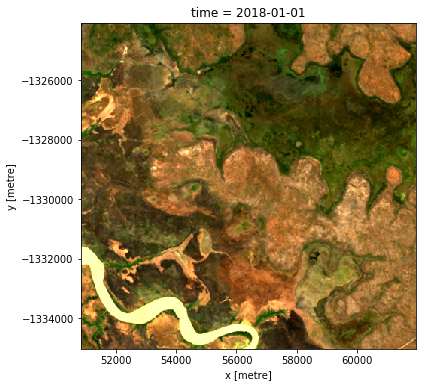

In [6]:
ds[['red', 'green', 'blue']].isel(time=0).to_array().plot.imshow(robust=True, figsize=(6,6))

In [11]:
print  (ds.min(), ds.max())

<xarray.Dataset>
Dimensions:  ()
Data variables:
    blue     int16 260
    green    int16 338
    red      int16 295
    nir      int16 400
    swir1    int16 140
    swir2    int16 97 <xarray.Dataset>
Dimensions:  ()
Data variables:
    blue     int16 1047
    green    int16 1492
    red      int16 1727
    nir      int16 3980
    swir1    int16 4781
    swir2    int16 3280


In [19]:
import imageio
import numpy as np

#darwin

#darwin[['nbar_red', 'nbar_green', 'nbar_blue']].isel(time=0).to_array().plot.imshow(robust=True, figsize=(10,10)) alternative command

red = ds.red.isel(time = 0).values
print(red.shape,red.max(), red.min(), red.dtype)

green = ds.green.isel(time = 0).values
print(green.shape,green.max(), green.min(), green.dtype)

blue = ds.blue.isel(time = 0).values
print(blue.shape,blue.max(),blue.min(), blue.dtype)

stack = np.dstack((red,green,blue))
print(stack.shape, stack.max(), stack.min(),stack.dtype)

#need to normalise to 0-255 for a PNG file
#first convert to floating point
stack = stack.astype(np.float32)
print(stack.shape, stack.max(), stack.min(),stack.dtype)

stack = np.clip(stack,0,1800)

stack = (stack/1800) *255

print(stack.shape, stack.max(), stack.min(),stack.dtype)

stack = stack.astype(np.uint8)
print(stack.shape, stack.max(), stack.min(),stack.dtype)

imageio.imwrite("red_team_2.png",stack)


(438, 445) 1727 295 int16
(438, 445) 1492 338 int16
(438, 445) 1047 260 int16
(438, 445, 3) 1727 260 int16
(438, 445, 3) 1727.0 260.0 float32
(438, 445, 3) 244.65834 36.833336 float32
(438, 445, 3) 244 36 uint8


## Be creative with the other two images and experiment combining bands

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

import datacube

dc = datacube.Datacube(app='welcome-to-dea')

type(dc)

datacube.api.core.Datacube

In [21]:
query={'lat': (-12.65,-12.55),
         'lon': (132.46,132.56),
         'time':('2018-01-01', '2020-01-15')}

ds = dc.load(product='ls8_nbart_geomedian_annual', **query)

ds


<xarray.Dataset>
Dimensions:  (time: 1, x: 445, y: 438)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * y        (y) float64 -1.324e+06 -1.324e+06 ... -1.335e+06 -1.335e+06
  * x        (x) float64 5.084e+04 5.086e+04 5.089e+04 ... 6.191e+04 6.194e+04
Data variables:
    blue     (time, y, x) int16 469 481 493 476 483 544 ... 510 491 482 488 488
    green    (time, y, x) int16 579 610 621 596 606 694 ... 698 674 650 651 650
    red      (time, y, x) int16 667 713 738 689 708 791 ... 840 809 786 792 794
    nir      (time, y, x) int16 1250 1422 1508 1422 1416 ... 1922 1926 1937 1885
    swir1    (time, y, x) int16 1747 2110 2336 2175 2070 ... 2330 2275 2288 2318
    swir2    (time, y, x) int16 1465 1592 1721 1656 1584 ... 1749 1652 1685 1734
Attributes:
    crs:      EPSG:3577

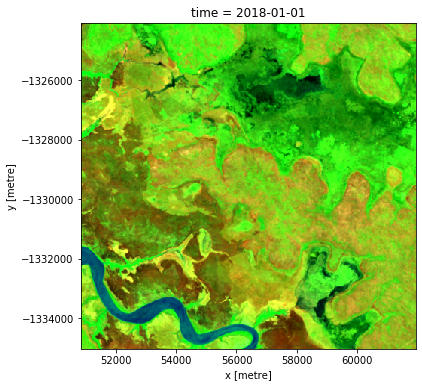

In [24]:
ds[['swir2', 'nir', 'green']].isel(time=0).to_array().plot.imshow(robust=True, figsize=(6,6))

In [28]:
import imageio
import numpy as np

#darwin

#darwin[['nbar_red', 'nbar_green', 'nbar_blue']].isel(time=0).to_array().plot.imshow(robust=True, figsize=(10,10)) alternative command

swir2 = ds.swir2.isel(time = 0).values
print(swir2.shape,swir2.max(), swir2.min(), swir2.dtype)

nir = ds.nir.isel(time = 0).values
print(nir.shape,nir.max(), nir.min(), nir.dtype)

green = ds.green.isel(time = 0).values
print(green.shape,green.max(),green.min(), green.dtype)

stack = np.dstack((swir2,nir,green))
print(stack.shape, stack.max(), stack.min(),stack.dtype)

#need to normalise to 0-255 for a PNG file
#first convert to floating point
stack = stack.astype(np.float32)
print(stack.shape, stack.max(), stack.min(),stack.dtype)

stack = np.clip(stack,0,2500)

stack = (stack/2500) *255

print(stack.shape, stack.max(), stack.min(),stack.dtype)

stack = stack.astype(np.uint8)
print(stack.shape, stack.max(), stack.min(),stack.dtype)

imageio.imwrite("red_team_3.png",stack)

(438, 445) 3280 97 int16
(438, 445) 3980 400 int16
(438, 445) 1492 338 int16
(438, 445, 3) 3980 97 int16
(438, 445, 3) 3980.0 97.0 float32
(438, 445, 3) 255.0 9.894 float32
(438, 445, 3) 255 9 uint8


In [30]:
#now look at fractional cover

ds = dc.load(product='ls8_fc_albers', **query)

ds

<xarray.Dataset>
Dimensions:  (time: 34, x: 445, y: 438)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-04T01:17:08.500000 ... 2019-06-16T01:16:50
  * y        (y) float64 -1.324e+06 -1.324e+06 ... -1.335e+06 -1.335e+06
  * x        (x) float64 5.084e+04 5.086e+04 5.089e+04 ... 6.191e+04 6.194e+04
Data variables:
    BS       (time, y, x) int16 33 30 29 23 28 26 25 25 ... 15 21 21 21 18 17 19
    PV       (time, y, x) int16 43 44 43 43 42 41 40 40 ... 32 29 27 25 29 32 28
    NPV      (time, y, x) int16 24 26 27 33 30 33 35 34 ... 51 50 51 52 51 50 51
    UE       (time, y, x) int16 7 7 7 7 7 7 7 7 7 ... 14 13 15 16 16 16 17 17 16
Attributes:
    crs:      EPSG:3577

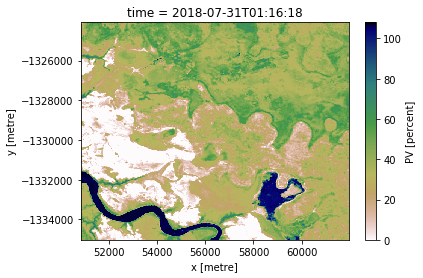

In [57]:
#ds.PV.plot(cmap='gist_earth_r')
ds.PV.isel(time=13).plot(cmap='gist_earth_r')

In [70]:
nice = ds.PV.isel(time=13).values
print (nice.dtype,nice.shape,nice.max())
#nice = nice *2
nice = nice/nice.max()  #this is another way of normalising the image
#nice = nice.astype(np.uint8)

print (nice.dtype,nice.shape,nice.max())

color_arr = plt.cm.gist_earth_r(nice) #converting 2d array into a 3d array

print (color_arr.dtype,color_arr.shape,color_arr.max())

#nice = nice.astype(np.uint8)
imageio.imwrite("red_team_4.png",color_arr)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


int16 (438, 445) 108
float64 (438, 445) 1.0
float64 (438, 445, 4) 1.0
